In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [51]:
sd_x = list()
sd_y = list()

for i in range(0, 3000):
    x = random.randrange(0, 10001)
    y = random.randrange(0, 10001)
    sd_x.append(x)
    sd_y.append(y)

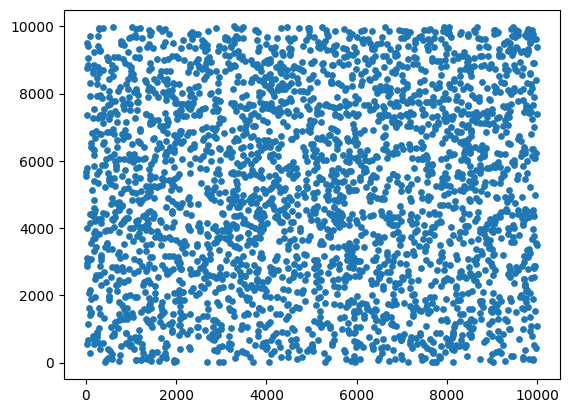

In [52]:
plt.scatter(sd_x, sd_y, s=15)

In [47]:
md_1_x = list()
md_1_y = list()
md_2_x = list()
md_2_y = list()
md_3_x = list()
md_3_y = list()
md_4_x = list()
md_4_y = list()
md_5_x = list()
md_5_y = list()

for i in range(0, 3000):
    x = random.randrange(0, 10001)
    y = random.randrange(0, 10001)
    md_1_x.append(x)
    md_1_y.append(y)
for i in range(0, 3000):
    x = random.randrange(0, 10001)
    y = random.randrange(0, 10001)
    md_2_x.append(x)
    md_2_y.append(y)
for i in range(0, 3000):
    x = random.randrange(0, 10001)
    y = random.randrange(0, 10001)
    md_3_x.append(x)
    md_3_y.append(y)
for i in range(0, 3000):
    x = random.randrange(0, 10001)
    y = random.randrange(0, 10001)
    md_4_x.append(x)
    md_4_y.append(y)
for i in range(0, 3000):
    x = random.randrange(0, 10001)
    y = random.randrange(0, 10001)
    md_5_x.append(x)
    md_5_y.append(y)

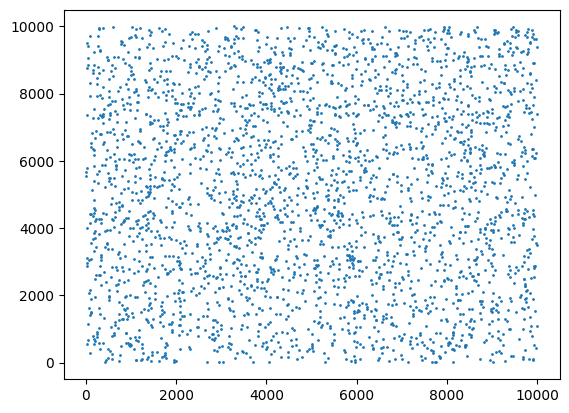

In [53]:
plt.scatter(sd_x, sd_y, s=1)

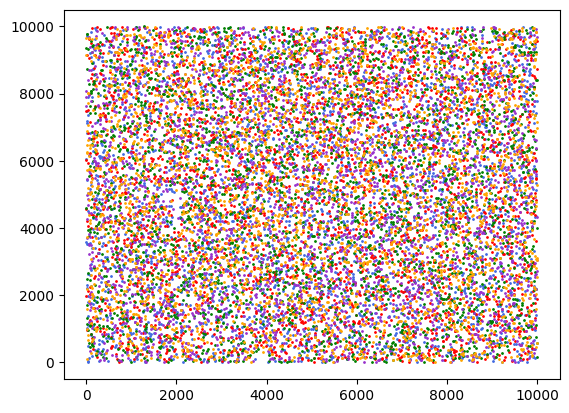

In [50]:
plt.scatter(md_1_x, md_1_y, s=1, c='royalblue')
plt.scatter(md_2_x, md_2_y, s=1, c='red')
plt.scatter(md_3_x, md_3_y, s=1, c='green')
plt.scatter(md_4_x, md_4_y, s=1, c = 'darkorchid')
plt.scatter(md_5_x, md_5_y, s=1, c = 'orange')